# Cursos de Series de tiempo con *Machine Learning*
## Modulo 47.1 Modelo de LGBMRegressor
                        Elaborado por: Naren Castellon

<center><img src="./imagen/LightGBM%20copia.jpg" width="900" height="500"></center>

# **Contenido**

1. Introducción
2. Definición del Modelo
3. Caso de estudio: Forecasting Produccion de Cerveza
4. Cargando librerias y datos
5. Análisis Exploratorio de Datos
6. Modelando con MLForecast
7. Evaluar el rendimiento del modelo.
8. Conclusión

# 1. Introducción

El análisis y la predicción de series de tiempo son áreas fundamentales en el campo de la ciencia de datos y el aprendizaje automático. Las series de tiempo se caracterizan por datos secuenciales que están ordenados en función del tiempo, lo que las hace únicas y presenta desafíos particulares en términos de modelado y predicción. En este contexto, el modelo LGBMRegressor, basado en Gradient Boosting y LightGBM, ha demostrado ser una herramienta eficaz para abordar problemas de regresión en series de tiempo.

El LGBMRegressor se basa en el algoritmo de optimización Gradient-Based One-Side Sampling (GOSS) y el algoritmo de binning Leaf-Wise, lo que le permite lograr un rendimiento y una velocidad de entrenamiento superiores en comparación con otros algoritmos de Gradient Boosting. La capacidad de LightGBM para trabajar con grandes conjuntos de datos y lidiar con características complejas hace que sea una opción atractiva para el modelado de series de tiempo.

Al aplicar LGBMRegressor a series de tiempo, se pueden obtener varios beneficios. En primer lugar, el modelo es capaz de capturar patrones y dependencias temporales con alta precisión y eficiencia. Esto es particularmente relevante en situaciones donde la secuencia de datos y su relación temporal desempeñan un papel crítico en la predicción. Además, LGBMRegressor es capaz de manejar características de alta dimensionalidad y diferentes tipos de datos, lo que lo hace flexible y adaptable a diversos escenarios de series de tiempo.

Otro aspecto destacado del LGBMRegressor es su capacidad para lidiar con características no lineales y relaciones complejas entre las variables de entrada. Esto es especialmente útil en el análisis de series de tiempo, donde las relaciones entre variables pueden ser no lineales y requerir un modelo más sofisticado para capturarlas de manera efectiva.

Es importante destacar que, al aplicar LGBMRegressor a series de tiempo, también se deben considerar aspectos específicos, como la preparación adecuada de los datos, la selección y transformación de características relevantes, la configuración de ventanas de tiempo y la validación cruzada apropiada para evitar fugas de información del futuro.

En resumen, el LGBMRegressor es un modelo prometedor para el análisis y la predicción de series de tiempo. Su capacidad para capturar patrones temporales, lidiar con características complejas y manejar grandes volúmenes de datos lo convierte en una opción atractiva para abordar problemas de regresión en este dominio. Con un enfoque adecuado en la preparación de datos y la configuración de parámetros, el LGBMRegressor puede ser una herramienta poderosa para obtener predicciones precisas y significativas en el análisis de series de tiempo.

# Definición del Modelo LightGBM para Regresión

LightGBM es un framework de aprendizaje de máquinas de código abierto para realizar regresión y clasificación. Es una biblioteca de código abierto implementada en C++ y compatible con Python y R.

La definición matemática detrás de LightGBM para regresión se basa en el algoritmo de boosting de árbol de decisión.

A continuación, se presenta la ecuación de pérdida utilizada por LightGBM para el aprendizaje de árboles de decisión:

$$
L(\theta) = \sum_{i=1}^{n} \left[ y\_i - f(x\_i) \right]^2 + \sum_{j=1}^{T} \Omega(f\_j) \tag1
$$

Donde:

* $y\_i$ es el valor de la variable dependiente para el $i$-ésimo ejemplo de entrenamiento.
* $x\_i$ es el vector de características para el $i$-ésimo ejemplo de entrenamiento.
* $f(x\_i)$ es la predicción del $i$-ésimo ejemplo de entrenamiento, calculada como la suma de los árboles de decisión $f\_j$ construidos en el proceso de aprendizaje.
* $n$ es el número de ejemplos de entrenamiento.
* $T$ es el número de árboles construidos en el proceso de aprendizaje.
* $\Omega(f\_j)$ es una función de regularización, que se utiliza para controlar la complejidad de los árboles construidos.

La ecuación de pérdida se minimiza iterativamente en el proceso de aprendizaje. LightGBM utiliza una técnica llamada "Gradient Boosting Decision Tree" (GBDT), donde se construye un árbol de decisión a la vez, y en cada iteración se intenta minimizar la pérdida.

La función de regularización $\Omega(f\_j)$ se define como:

$$
\Omega(f\_j) = \gamma T + \frac{1}{2} \lambda {\sum}_{t=1}^{T} w\_t^2 \tag2
$$

Donde:

* $T$ es el número de hojas en el árbol de decisión $f\_j$.
* $w\_t$ es el valor en la hoja $t$-ésima.
* $\gamma$ y $\lambda$ son hiperparámetros que controlan el grado de regularización.

El objetivo del proceso de aprendizaje es encontrar los parámetros del modelo que minimizan la función de pérdida, incluyendo los pesos de los árboles de decisión y los valores de las hojas de cada árbol.

En el caso de la regresión, el objetivo es encontrar el modelo que proporcione la predicción más cercana al valor real de la variable dependiente.

# 3. Caso de estudio: **Forecasting de consumo de cerveza utilizando LightGBM para regresión**


En este caso de estudio, abordaremos el desafío de pronosticar el consumo de cerveza en función de diferentes variables relevantes. Utilizaremos el algoritmo LightGBM, una técnica de aprendizaje automático basada en gradient boosting, para desarrollar un modelo de regresión que pueda predecir con precisión el consumo de cerveza en litros.

**Datos:**
Los datos utilizados en este caso de estudio consisten en un conjunto de observaciones históricas del consumo de cerveza, así como variables relacionadas, como la temperatura promedio, la precipitación y el día de la semana. Estos datos se recopilaron durante un período de tiempo en una determinada ubicación y se utilizarán para entrenar y evaluar el modelo de pronóstico.

**Objetivo:**
El objetivo principal es construir un modelo de pronóstico preciso que pueda predecir el consumo de cerveza en función de las variables disponibles. Esto permitirá a las empresas y distribuidores de cerveza anticipar la demanda futura y tomar decisiones informadas sobre la producción, el abastecimiento y la logística.

**Pasos del caso de estudio:**

1. **Exploración de datos:** Comenzaremos explorando los datos históricos, analizando la distribución del consumo de cerveza, así como las relaciones entre las variables independientes y la variable objetivo. Esto nos ayudará a comprender mejor los datos y detectar posibles patrones o tendencias.

2. **Preparación de datos:** En esta etapa, realizaremos tareas de limpieza y preparación de datos. Esto puede incluir el manejo de valores faltantes, la normalización de variables y la codificación adecuada de variables categóricas. También dividiremos los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

3. **Entrenamiento del modelo:** Utilizaremos el algoritmo LightGBM para entrenar un modelo de regresión. Ajustaremos los hiperparámetros del modelo y utilizaremos técnicas como la validación cruzada para optimizar su rendimiento. Durante el entrenamiento, utilizaremos las variables independientes para predecir el consumo de cerveza.

4. **Evaluación del modelo:** Evaluaremos el rendimiento del modelo utilizando métricas de evaluación de regresión, como el error medio absoluto (MAE) o el error cuadrático medio (MSE). También visualizaremos los resultados, comparando las predicciones del modelo con los valores reales en un gráfico de dispersión.

5. **Pronóstico y toma de decisiones:** Una vez que el modelo esté entrenado y evaluado, lo utilizaremos para realizar pronósticos futuros del consumo de cerveza. Estos pronósticos pueden ayudar a las empresas a optimizar sus operaciones, realizar una planificación precisa y tomar decisiones basadas en la demanda esperada.

6. **Validación y refinamiento:** Como parte del proceso de mejora continua, validaremos periódicamente el modelo en datos actualizados y refiniremos el modelo si es necesario. Esto garantizará que el pronóstico siga siendo preciso a medida que cambien las condiciones y los patrones de consumo.

**Conclusiones:**
Este caso de estudio demuestra cómo el algoritmo LightGBM puede aplicarse con éxito al pronóstico del consumo de cerveza. Al utilizar variables relevantes y técnicas avanzadas de aprendizaje automático, podemos desarrollar un modelo de regresión preciso que permita a las empresas tomar decisiones informadas y anticipar la demanda futura. El pronóstico del consumo de cerveza es solo un ejemplo de cómo el algoritmo LightGBM puede aplicarse a problemas de regresión en una variedad de industrias y contextos. Su flexibilidad y eficacia lo convierten en una herramienta valiosa para el análisis y pronóstico de series de tiempo.

# 4. Cargando librerias y datos

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# Statsmodels 
# ==============================================================================
from statsmodels.tsa.stattools import adfuller

# Mlforecast
# ==============================================================================
from mlforecast import MLForecast
from utilsforecast.plotting import plot_series
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from utilsforecast.preprocessing import fill_gaps

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.stats import norm, skew

#plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
#plt.rcParams['lines.linewidth'] = 1.5

# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

In [3]:
data=pd.read_csv("./data//cerveja.csv").iloc[:,1:]
data

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
data.dropna(how="all",inplace=True)

In [6]:
data.replace({",":"."},regex=True,inplace=True)

In [7]:
data["Data"]=pd.to_datetime(data["Data"])

In [8]:
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [9]:
data.isnull().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

In [10]:
datos = data.copy()
days=["Monday","Tuesdat","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [11]:
datos["Day"]=datos["Data"].apply(lambda a : days[a.weekday()])

In [12]:
datos

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,Thursday
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,Monday
...,...,...,...,...,...,...,...,...
360,2015-12-27,24,21.1,28.2,13.6,1.0,32.307,Sunday
361,2015-12-28,22.64,21.1,26.7,0,0.0,26.095,Monday
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,Tuesdat
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,Wednesday


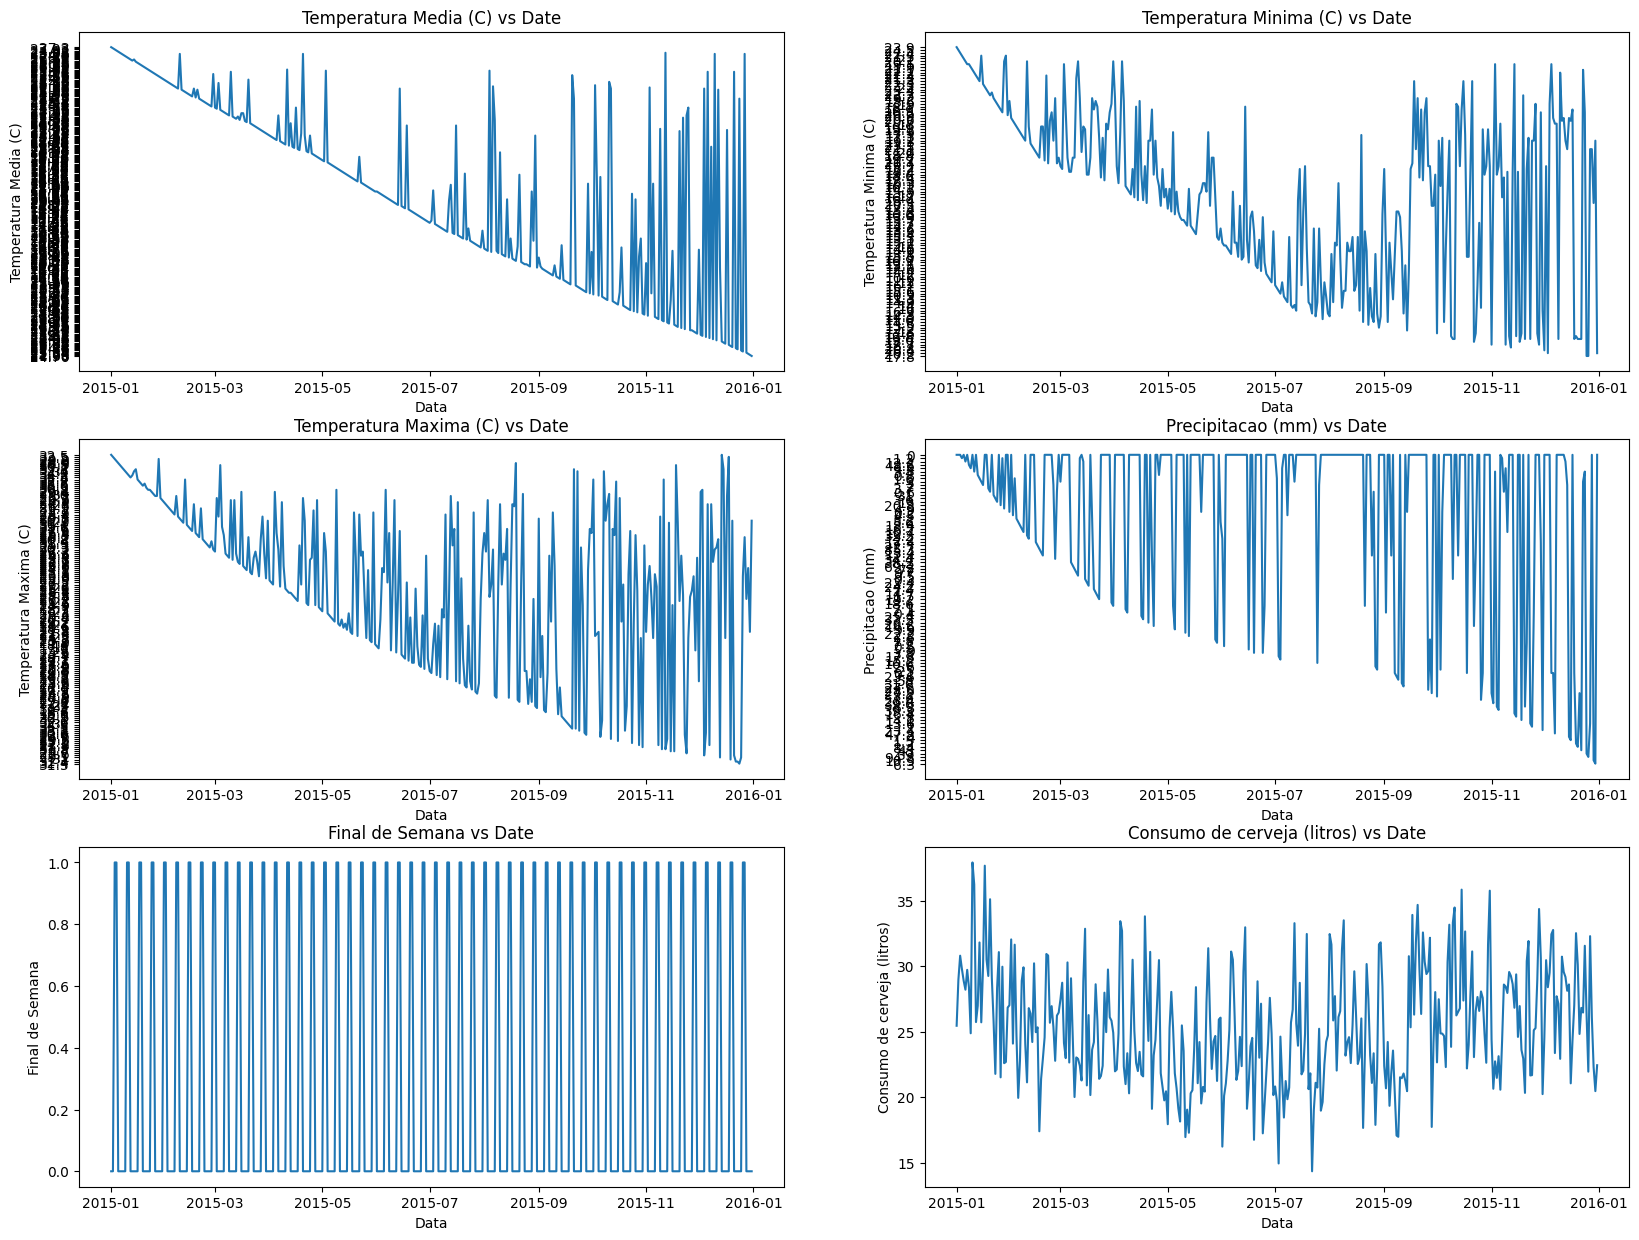

In [13]:
l2 = ['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,15))
for i in range(len(l2)):
    
    plt.subplot(3,2,i+1)
    sns.lineplot(x = data["Data"],y = l2[i],data = data)
    title = l2[i] + ' vs Date'
    plt.title(title)

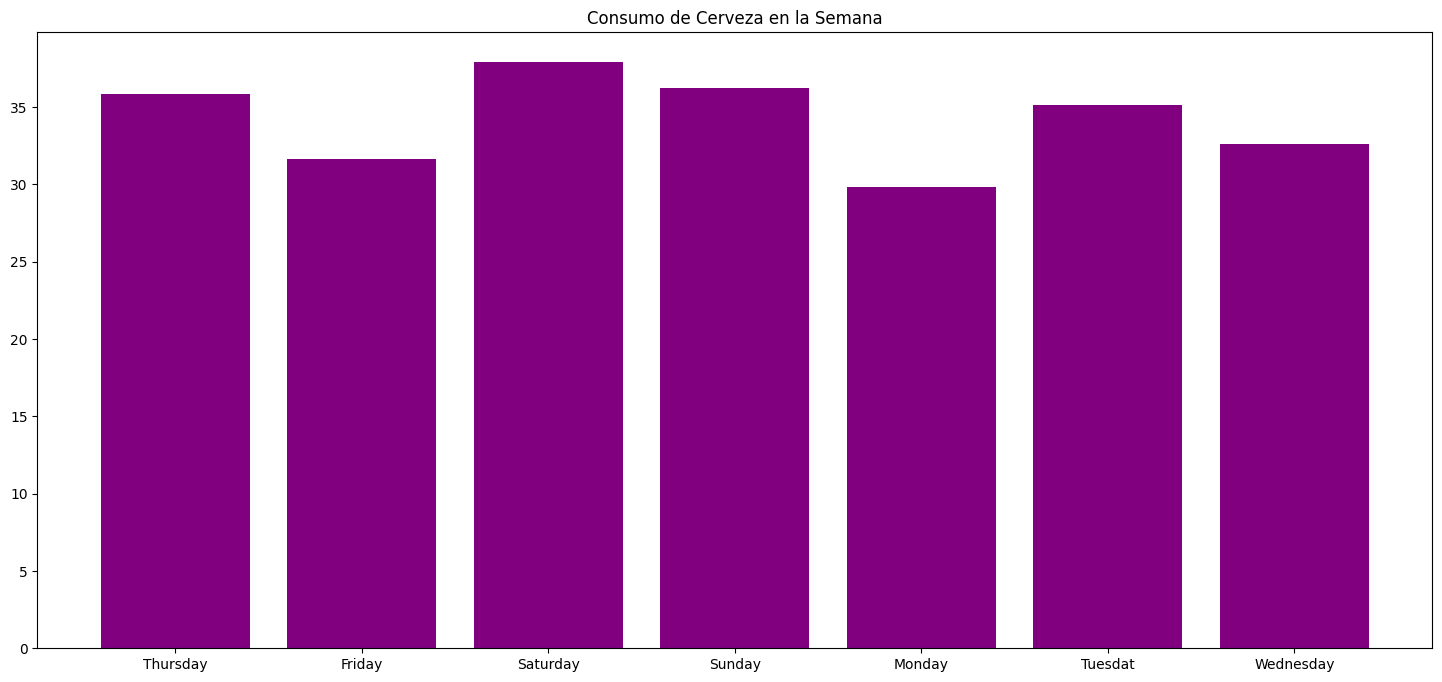

In [14]:
plt.figure(figsize=(18,8))
plt.bar(datos["Day"],datos["Consumo de cerveja (litros)"],color="purple")
plt.title("Consumo de Cerveza en la Semana")
plt.show()

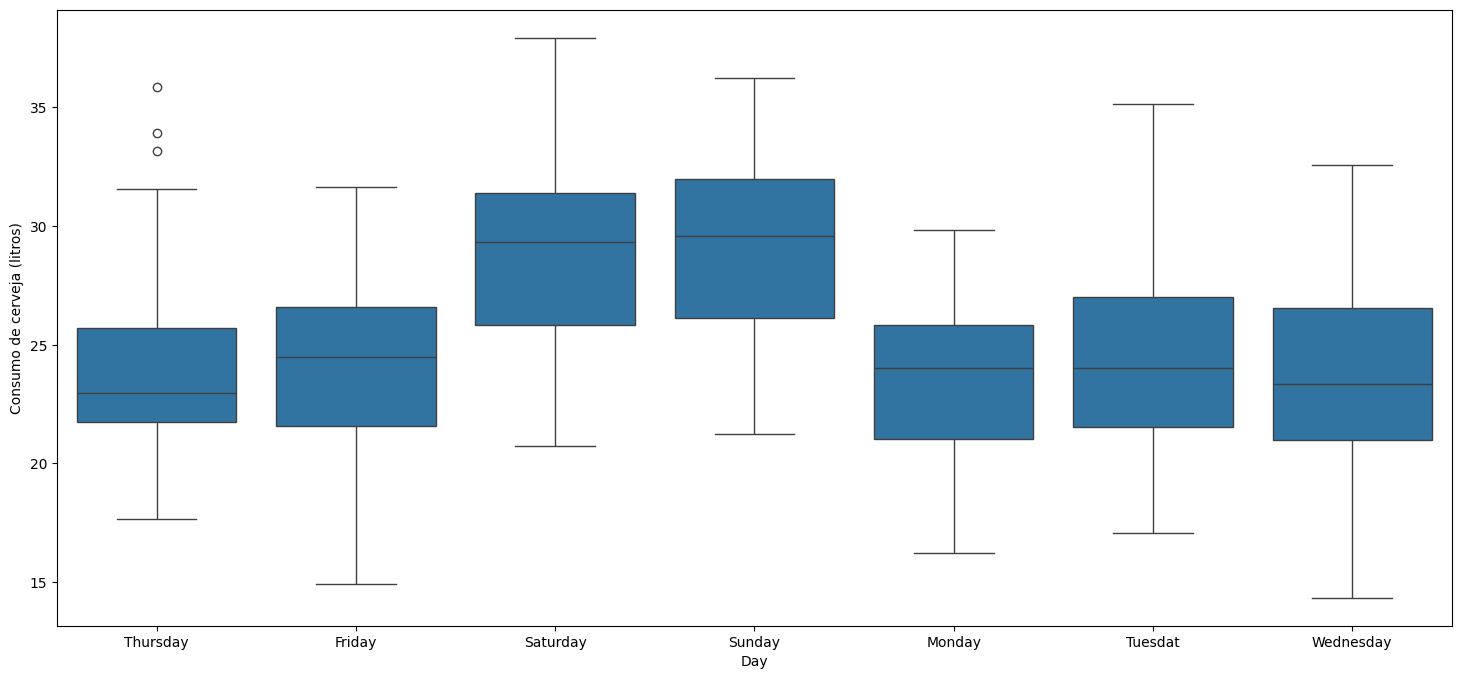

In [15]:
plt.figure(figsize=(18,8))
sns.boxplot(x="Day", y="Consumo de cerveja (litros)", data=datos)
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [17]:
data["Temperatura Media (C)"]=pd.to_numeric(data["Temperatura Media (C)"])
data["Temperatura Minima (C)"]=pd.to_numeric(data["Temperatura Minima (C)"])
data["Temperatura Maxima (C)"]=pd.to_numeric(data["Temperatura Maxima (C)"])
data["Precipitacao (mm)"]=pd.to_numeric(data["Precipitacao (mm)"])
data

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


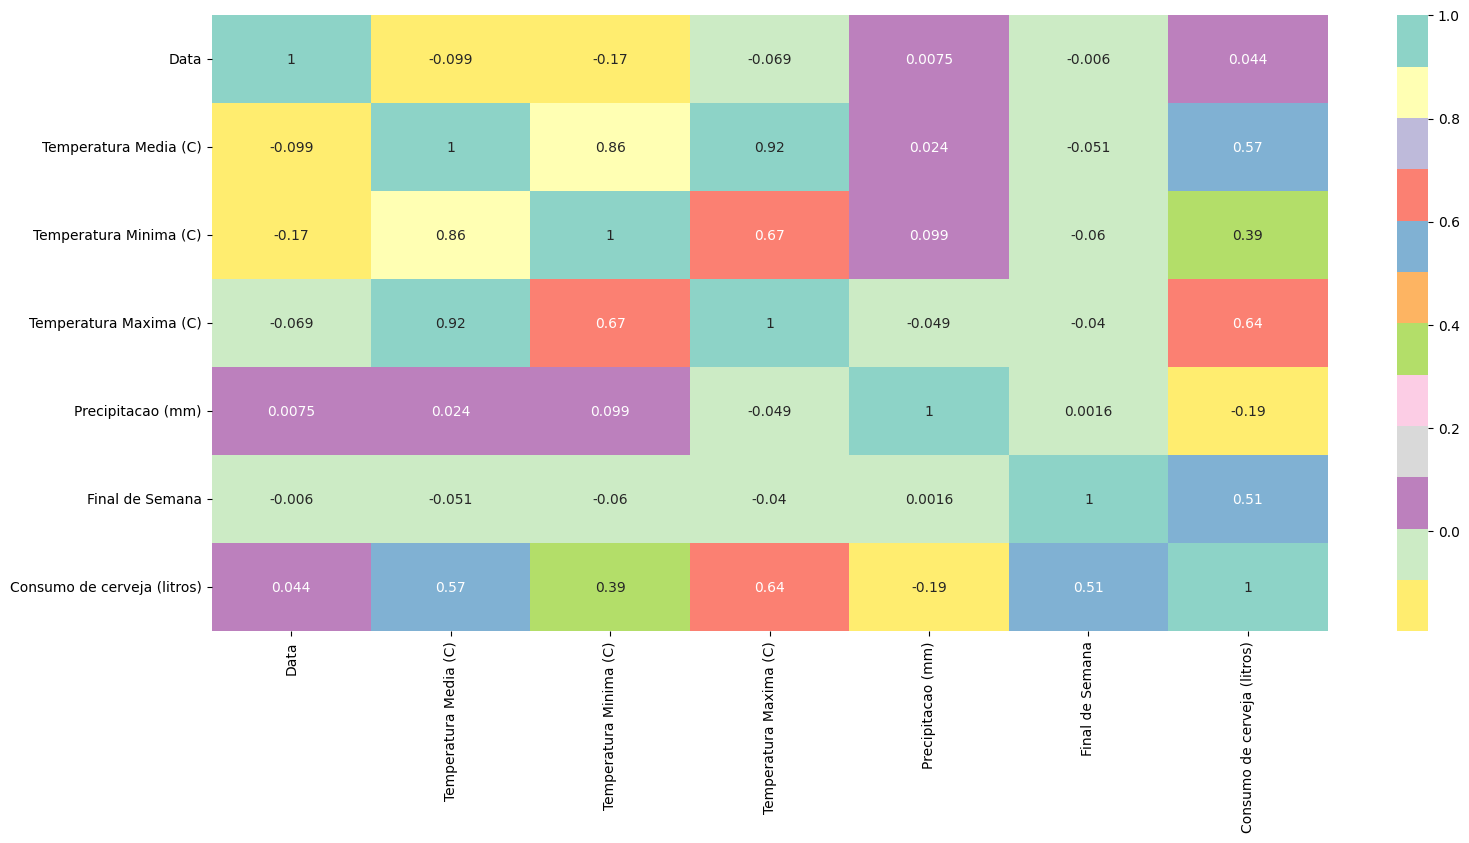

In [18]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,cmap="Set3_r")
plt.show()

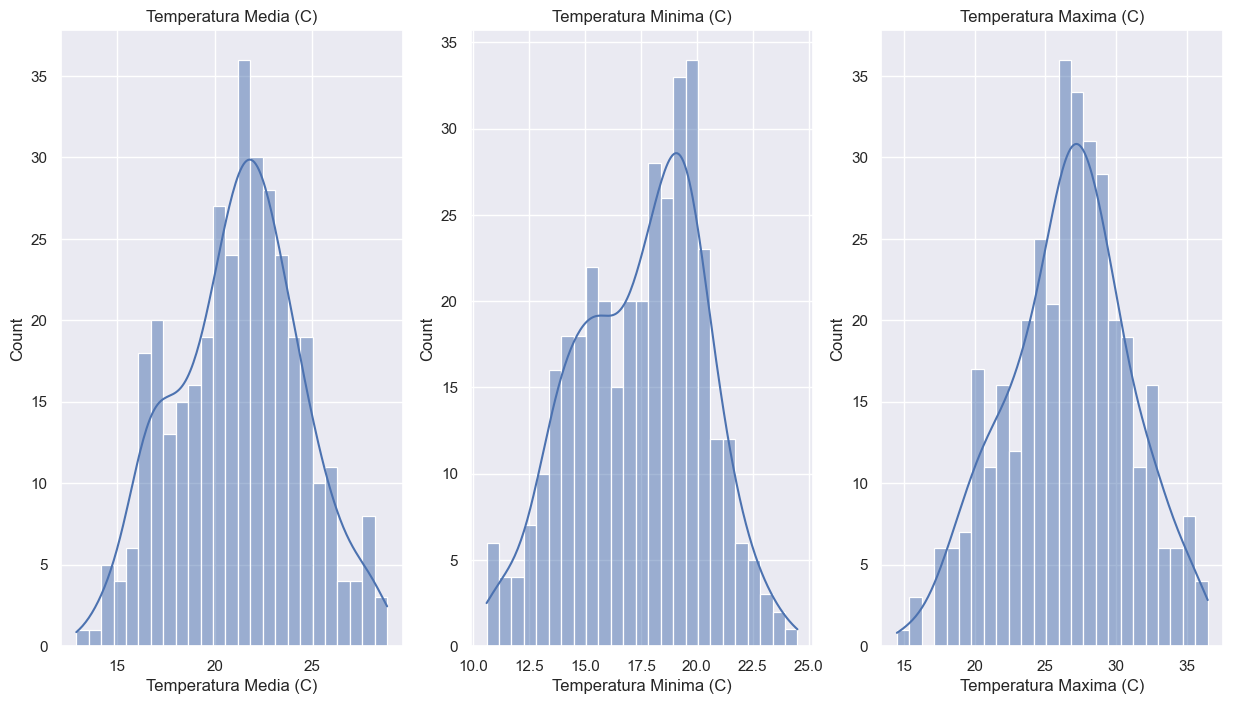

In [19]:
sns.set(style='darkgrid')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(15,8))
for name, ax in zip(['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)'], [ax1, ax2, ax3]):
    g = sns.histplot(data, x=name, bins=25, ax=ax, kde= True).set(title=name)

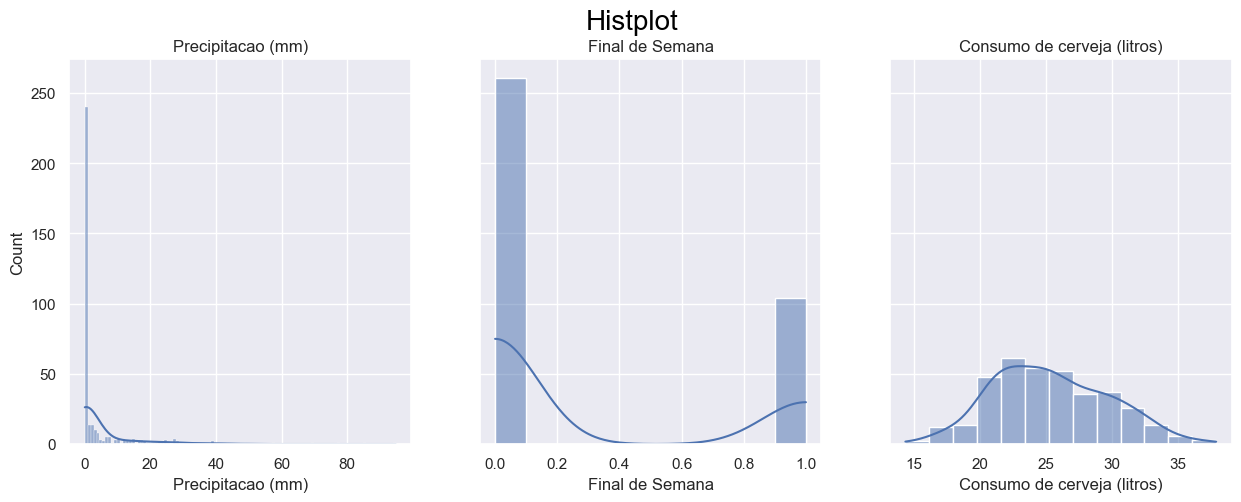

In [20]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Histplot\n',fontsize=20,color="black")
print("\n")
sns.histplot(ax=ax[0], x="Precipitacao (mm)",kde= True, data=data)
ax[0].set_title("Precipitacao (mm)")

sns.histplot(ax=ax[1], x="Final de Semana",kde= True, data=data)
ax[1].set_title("Final de Semana")

sns.histplot(ax=ax[2], x="Consumo de cerveja (litros)",kde= True, data=data)
ax[2].set_title("Consumo de cerveja (litros)")

plt.show()

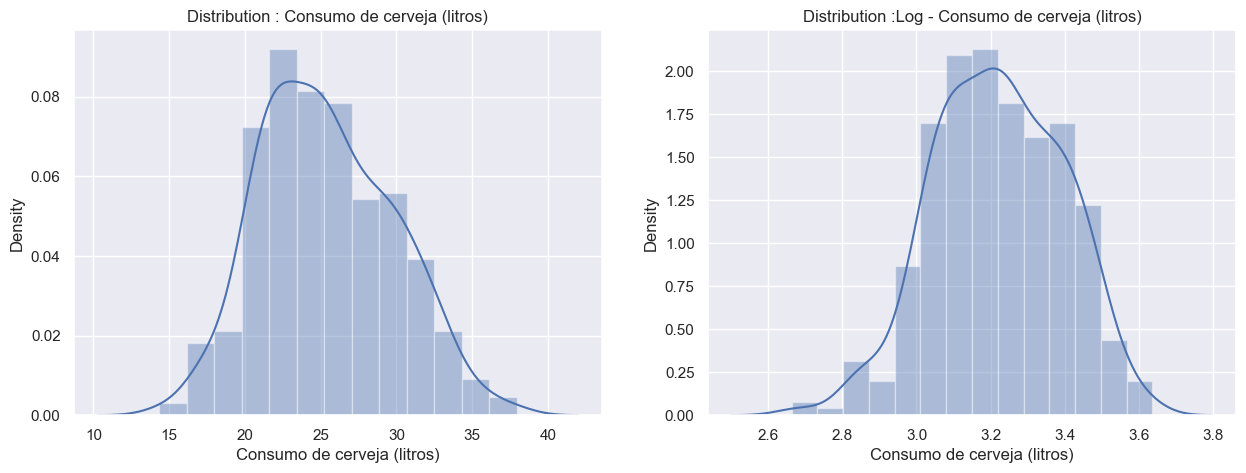

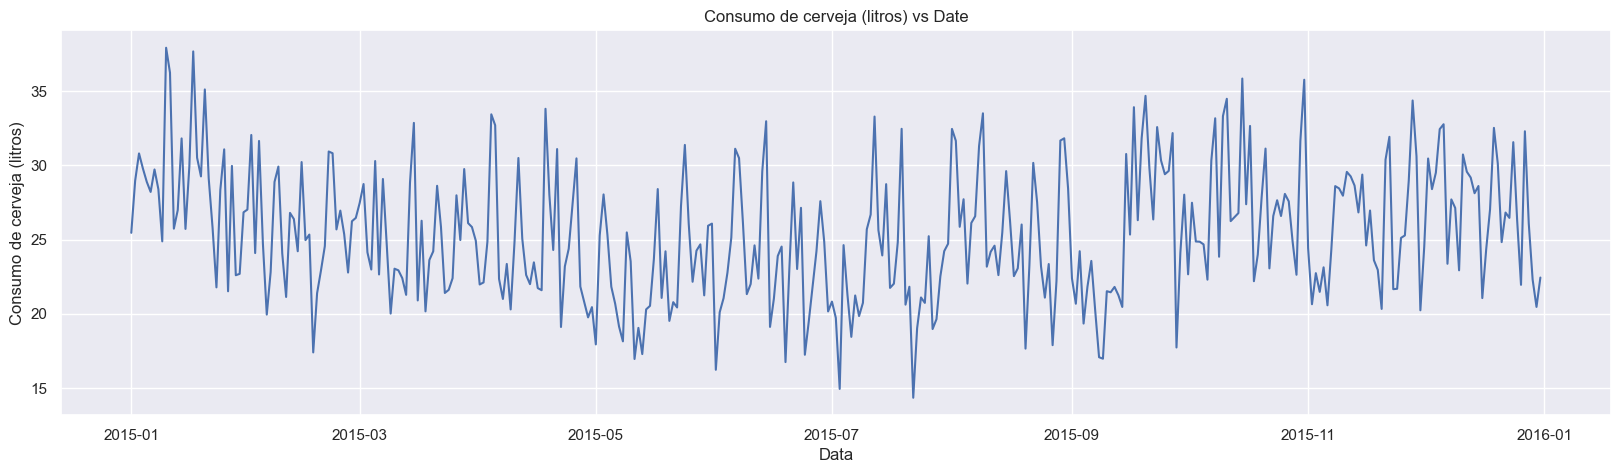

In [21]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(data['Consumo de cerveja (litros)']);
plt.title('Distribution : Consumo de cerveja (litros)')

plt.subplot(1,2,2)
sns.distplot(np.log(data['Consumo de cerveja (litros)']));
plt.title('Distribution :Log - Consumo de cerveja (litros)')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = data["Data"] ,y = 'Consumo de cerveja (litros)',data = data,palette = color1);
plt.title('Consumo de cerveja (litros) vs Date')

plt.show()
fig.tight_layout(pad = 2)

Nuestro objetivo es poder pronosticar el consumo de cerveza

In [22]:
data =  data.rename(columns={"Data":"ds", "Consumo de cerveja (litros)":"y"})
data["unique_id"] = 1
data

,ds,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,y,unique_id
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1
...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,1
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,1
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,1
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,1


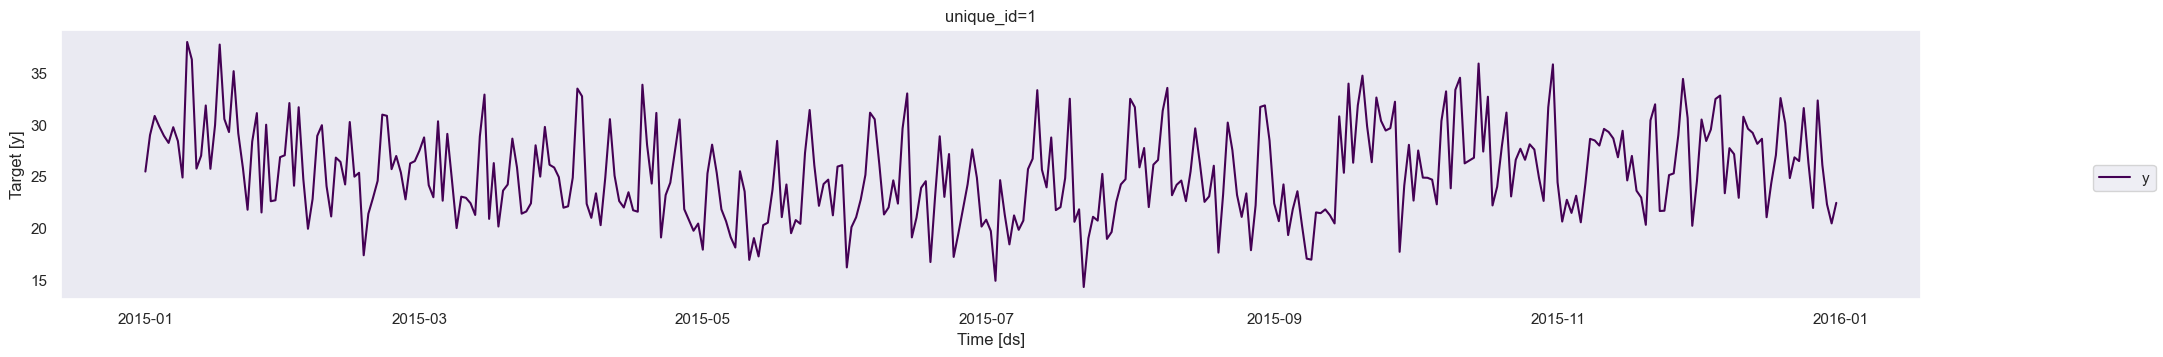

In [23]:
plot_series(data)

# **Split the data into training and testing** 

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 days.

In [24]:
train = data[data.ds<='2015-12-01'] 
test=data[(data['ds'] > '2015-12-01')]

test.drop("y",axis=1, inplace=True)
train.shape, test.shape

((335, 8), (30, 7))

In [25]:
# Datos de entrenamiento
train

,ds,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,y,unique_id
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1
...,...,...,...,...,...,...,...,...
330,2015-11-27,22.28,17.6,28.4,0.0,0.0,28.979,1
331,2015-11-28,23.70,18.7,29.8,0.0,1.0,34.382,1
332,2015-11-29,22.38,20.5,26.0,17.4,1.0,30.617,1
333,2015-11-30,19.10,16.7,23.3,23.4,0.0,20.238,1


In [26]:
# Datos de prueba
test

,ds,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,unique_id
335,2015-12-02,22.10,18.2,29.4,0.0,0.0,1
336,2015-12-03,22.44,20.2,26.1,0.0,0.0,1
337,2015-12-04,22.76,19.0,29.1,0.0,0.0,1
338,2015-12-05,24.80,19.5,30.6,0.1,1.0,1
339,2015-12-06,23.12,20.6,28.0,0.1,1.0,1
340,2015-12-07,20.04,18.0,23.9,47.8,0.0,1
341,2015-12-08,21.70,18.0,28.0,0.0,0.0,1
342,2015-12-09,23.96,19.6,27.9,0.0,0.0,1
343,2015-12-10,24.00,22.2,27.7,0.0,0.0,1
344,2015-12-11,24.04,20.7,30.3,0.0,0.0,1


# Modelando con MLForecast

In [1]:
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

from mlforecast.target_transforms import LocalRobustScaler, LocalStandardScaler

- Cargamos los modelos

In [2]:
models = [LGBMRegressor(random_state = 13579, n_estimators=1200, max_depth= 6, ),DecisionTreeRegressor() ]

- Construimos el Modelo

In [29]:
mlf = MLForecast(models=models,
                 freq='D', 
                 lags=range(1,14,1),
                 #lag_transforms={1: [expanding_mean],7: [(rolling_mean, 7)] },
                 target_transforms=[Differences([1]), LocalRobustScaler(scale='iqr')], # LocalRobustScaler(scale='iqr')  Differences([1]), LocalStandardScaler ()
                 date_features=["year", "month", "day"],
                 num_threads=2
                 ) 

In [30]:
mlf.preprocess(train)

,ds,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,y,unique_id,lag1,lag2,...,lag7,lag8,lag9,lag10,lag11,lag12,lag13,year,month,day
14,2015-01-15,25.86,21.5,32.8,3.0,0.0,-0.985604,1,0.716364,0.157964,...,-0.243872,0.199518,-0.142246,-0.176017,-0.194071,0.250564,0.510310,2015,1,15
15,2015-01-16,26.50,22.3,32.7,2.0,0.0,0.619718,1,-0.985604,0.716364,...,-0.582523,-0.243872,0.199518,-0.142246,-0.176017,-0.194071,0.250564,2015,1,16
16,2015-01-17,28.86,22.0,35.8,0.0,1.0,1.170337,1,0.619718,-0.985604,...,1.995020,-0.582523,-0.243872,0.199518,-0.142246,-0.176017,-0.194071,2015,1,17
17,2015-01-18,28.26,23.4,35.6,0.0,1.0,-1.151350,1,1.170337,0.619718,...,-0.298031,1.995020,-0.582523,-0.243872,0.199518,-0.142246,-0.176017,2015,1,18
18,2015-01-19,28.22,22.7,36.5,3.7,0.0,-0.232044,1,-1.151350,1.170337,...,-1.671932,-0.298031,1.995020,-0.582523,-0.243872,0.199518,-0.142246,2015,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2015-11-27,22.28,17.6,28.4,0.0,0.0,0.538791,1,-0.010272,0.497704,...,-0.445102,-0.137888,-0.557466,0.330402,-0.779550,0.360750,-0.317952,2015,11,27
331,2015-11-28,23.70,18.7,29.8,0.0,1.0,0.804762,1,0.538791,-0.010272,...,1.529531,-0.445102,-0.137888,-0.557466,0.330402,-0.779550,0.360750,2015,11,28
332,2015-11-29,22.38,20.5,26.0,17.4,1.0,-0.622053,1,0.804762,0.538791,...,0.203720,1.529531,-0.445102,-0.137888,-0.557466,0.330402,-0.779550,2015,11,29
333,2015-11-30,19.10,16.7,23.3,23.4,0.0,-1.651389,1,-0.622053,0.804762,...,-1.634581,0.203720,1.529531,-0.445102,-0.137888,-0.557466,0.330402,2015,11,30


## Entrenamos el Modelo

In [31]:
# fit the models
mlf.fit(train,fitted=True, static_features= [],
        prediction_intervals=PredictionIntervals(n_windows=3, h = 30, method="conformal_distribution") )

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 231, number of used features: 20
[LightGBM] [Info] Start training from score -0.057666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

MLForecast(models=[LGBMRegressor, DecisionTreeRegressor], freq=D, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13'], date_features=['year', 'month', 'day'], num_threads=2)

In [32]:
result=mlf.forecast_fitted_values()
result=result.set_index("unique_id")
result

,ds,y,LGBMRegressor,DecisionTreeRegressor
unique_id,,,,
1,2015-01-15,25.724,25.726199,25.724
1,2015-01-16,29.938,29.937305,29.938
1,2015-01-17,37.690,37.689765,37.690
1,2015-01-18,30.524,30.523934,30.524
1,2015-01-19,29.265,29.265966,29.265
...,...,...,...,...
1,2015-11-27,28.979,28.979693,28.979
1,2015-11-28,34.382,34.381642,34.382
1,2015-11-29,30.617,30.616239,30.617


- Visualizando los `Fitted Values`

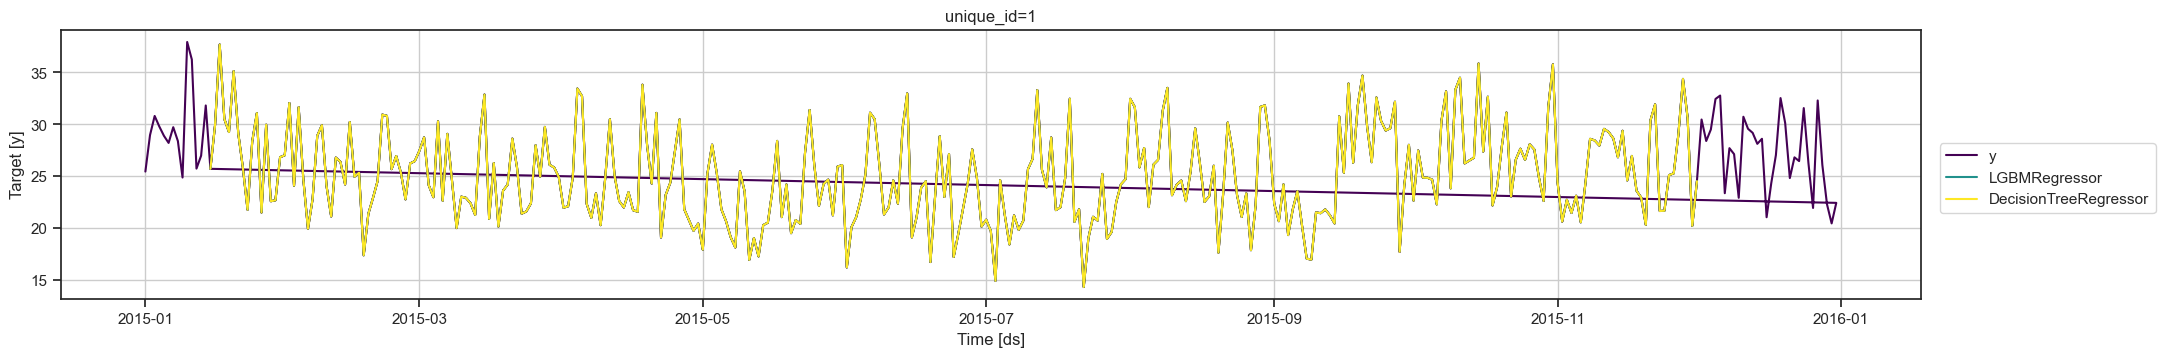

In [33]:
sns.set(style = 'ticks')  # 'darkgrid' 'white', 'dark', 'whitegrid', 'darkgrid', 'ticks'
plot_series(data, result.reset_index())


## Forecasting

In [34]:
forecast_df = mlf.predict(h = 30, level=[95], X_df=test) 
forecast_df.head()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

,unique_id,ds,LGBMRegressor,DecisionTreeRegressor,LGBMRegressor-lo-95,LGBMRegressor-hi-95,DecisionTreeRegressor-lo-95,DecisionTreeRegressor-hi-95
0,1,2015-12-02,25.780688,26.604,19.241050,32.320325,17.593117,35.614883
1,1,2015-12-03,20.883888,27.240,15.452800,26.314976,23.586314,30.893686
2,1,2015-12-04,21.433098,26.716,17.297613,25.568583,23.315957,30.116043
3,1,2015-12-05,28.840735,38.945,23.294000,34.387470,36.532491,41.357509
4,1,2015-12-06,26.403314,43.077,24.187174,28.619454,35.124006,51.029994


- Visualizando el Forecasting

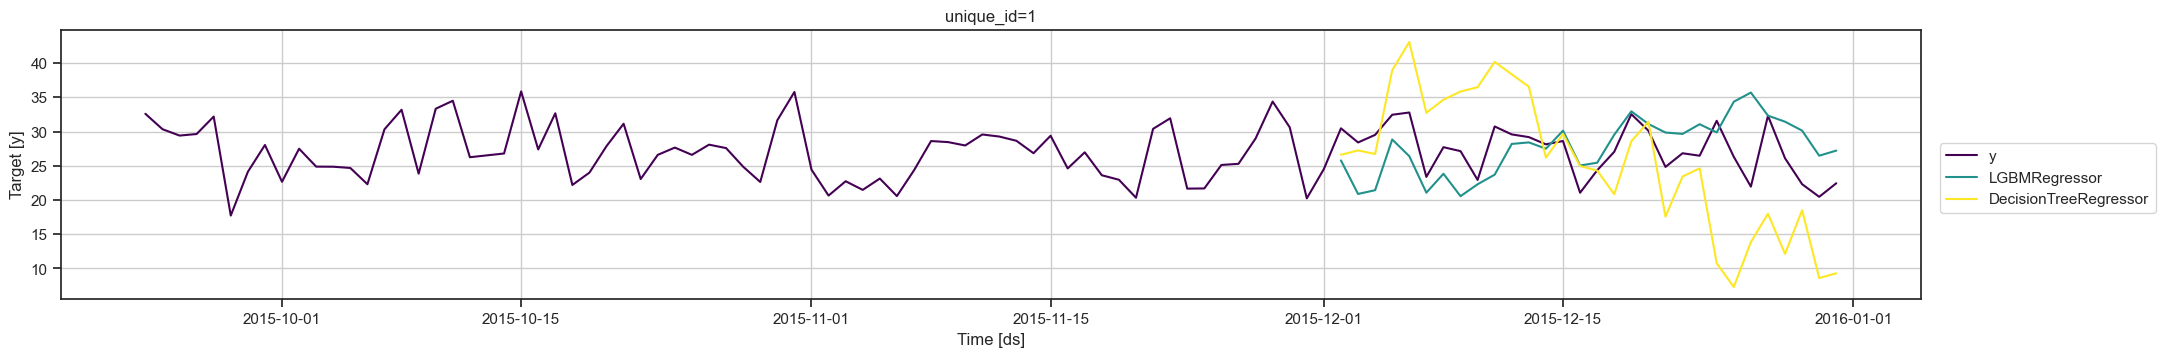

In [35]:
plot_series(data, forecast_df, max_insample_length= 100)

- Importancias de las características del Modelo

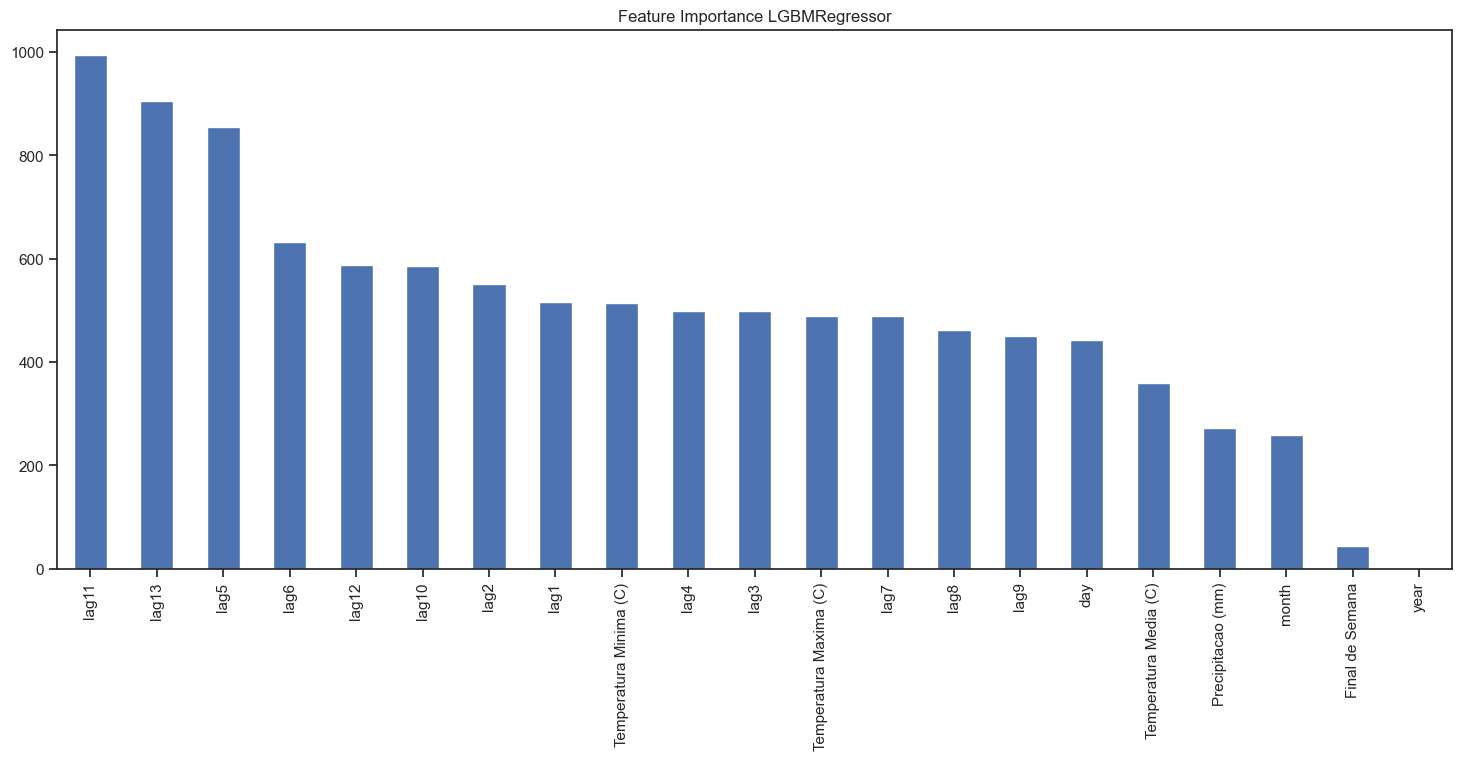

In [36]:
pd.Series(mlf.models_["LGBMRegressor"].feature_importances_, 
              index=mlf.ts.features_order_).sort_values(ascending=False).plot.bar(title='Feature Importance LGBMRegressor')

plt.show()

## **Evaluar el rendimiento del modelo**

### **Realizar cross-validation para Series de tiempo**

In [37]:
cv_result_ml = mlf.cross_validation(
    train,
    n_windows=5,  # number of models to train/splits to perform
    h=30,  )

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 171, number of used features: 20
[LightGBM] [Info] Start training from score -0.036927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [38]:
cv_result_ml

,unique_id,ds,cutoff,y,LGBMRegressor,DecisionTreeRegressor
0,1,2015-07-05,2015-07-04,21.294,23.734908,24.776
1,1,2015-07-06,2015-07-04,18.448,23.576639,25.784
2,1,2015-07-07,2015-07-04,21.237,24.408726,31.771
3,1,2015-07-08,2015-07-04,19.849,25.575575,32.804
4,1,2015-07-09,2015-07-04,20.740,28.211572,35.968
...,...,...,...,...,...,...
145,1,2015-11-27,2015-11-01,28.979,20.052253,26.378
146,1,2015-11-28,2015-11-01,34.382,17.091597,25.816
147,1,2015-11-29,2015-11-01,30.617,18.379982,26.042
148,1,2015-11-30,2015-11-01,20.238,16.292909,28.524


In [39]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [40]:
evaluation_df_ml_rmse = evaluate_cross_validation(cv_result_ml.set_index("unique_id"), rmse)
evaluation_df_ml_mae = evaluate_cross_validation(cv_result_ml.set_index("unique_id"), mae)
evaluation_df_ml_mape = evaluate_cross_validation(cv_result_ml.set_index("unique_id"), mape)
evaluation_df_ml_smape = evaluate_cross_validation(cv_result_ml.set_index("unique_id"), smape)

In [41]:
print("   "*9, "Métrica RMSE")
print(evaluation_df_ml_rmse)
print("=================="*4)
print("   "*9, "Métrica MAE")
print(evaluation_df_ml_mae)
print("=================="*4)
print("   "*9, "Métrica MAPE")
print(evaluation_df_ml_mape)
print("=================="*4)
print("   "*9, "Métrica SMAPE")
print(evaluation_df_ml_smape)

                            Métrica RMSE
           LGBMRegressor  DecisionTreeRegressor     best_model
unique_id                                                     
1              11.004163              18.473436  LGBMRegressor
                            Métrica MAE
           LGBMRegressor  DecisionTreeRegressor     best_model
unique_id                                                     
1               9.245764              16.001327  LGBMRegressor
                            Métrica MAPE
           LGBMRegressor  DecisionTreeRegressor     best_model
unique_id                                                     
1              37.292435              66.062597  LGBMRegressor
                            Métrica SMAPE
           LGBMRegressor  DecisionTreeRegressor     best_model
unique_id                                                     
1              39.806206               49.68568  LGBMRegressor


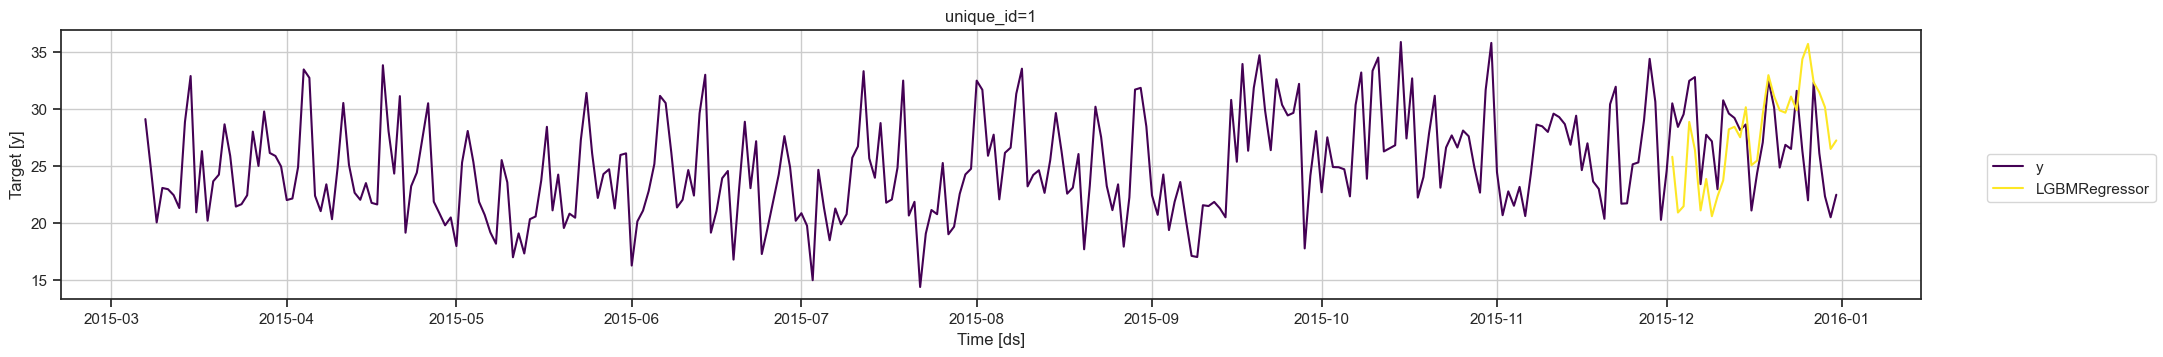

In [42]:
plot_series(data, forecast_df, models= ["LGBMRegressor"], max_insample_length= 300)

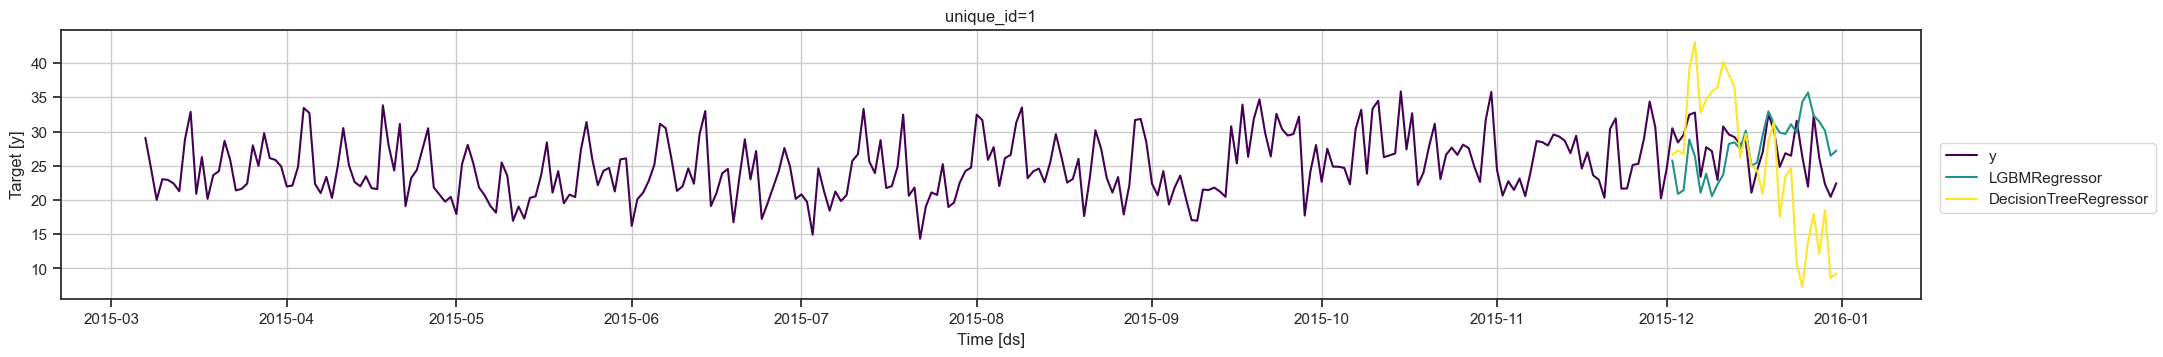

In [43]:
plot_series(data, forecast_df, max_insample_length= 300)

# Conclusión